# Nanobot on Colab (Direct Reuse) + VolcEngine DeepSeek API

This notebook follows the **official nanobot quick start flow**:
1. Install `nanobot-ai`
2. Run `nanobot onboard`
3. Configure `~/.nanobot/config.json`
4. Run `nanobot agent`

Then I adds a small automated evaluation section with VolcEngine API (`responses.create`) for assignment reporting.

In [ ]:
# 1) Install dependencies
!pip -q install --upgrade nanobot-ai openai pandas matplotlib seaborn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 143.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/

In [ ]:
# 2) Check nanobot CLI
!nanobot --help

                                                                                
 Usage: nanobot [OPTIONS] COMMAND [ARGS]...                                     
                                                                                
 🐈 nanobot - Personal AI Assistant                                             
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ --version             -v                                                     │
│ --install-completion            Install completion for the current shell.    │
│ --show-completion               Show completion for the current shell, to    │
│                                 copy it or customize the installation.       │
│ --help                          Show this message and exit.                  │
╰──────────────────────────────────────────────────────────────────────────────╯
╭─ Commands ─────────────────

In [ ]:
# 3) Set ARK API key (VolcEngine)
import os
from getpass import getpass

if not os.getenv('ARK_API_KEY'):
    os.environ['ARK_API_KEY'] = getpass('Enter ARK_API_KEY: ')

ENDPOINT_ID = 'ep-20260226144712-mkcds'  # replace if needed
VOLC_BASE_URL = 'https://ark.cn-beijing.volces.com/api/v3'
print('ARK_API_KEY loaded:', bool(os.getenv('ARK_API_KEY')))

Enter ARK_API_KEY: ··········
ARK_API_KEY loaded: True


In [ ]:
# 4) nanobot onboard (official step)
!nanobot onboard

✓ Created config at /root/.nanobot/config.json
  Created TOOLS.md
  Created AGENTS.md
  Created SOUL.md
  Created HEARTBEAT.md
  Created USER.md
  Created memory/MEMORY.md
  Created memory/HISTORY.md

🐈 nanobot is ready!

Next steps:
  1. Add your API key to ~/.nanobot/config.json
     Get one at: https://openrouter.ai/keys
  2. Chat: nanobot agent -m "Hello!"

Want Telegram/WhatsApp? See: https://github.com/HKUDS/nanobot#-chat-apps


In [ ]:
# 5) Write nanobot config for volcengine provider
# According to nanobot docs, provider config supports apiKey and optional apiBase.

import json
from pathlib import Path

cfg_path = Path.home() / '.nanobot' / 'config.json'
cfg_path.parent.mkdir(parents=True, exist_ok=True)

cfg = {}
if cfg_path.exists():
    try:
        cfg = json.loads(cfg_path.read_text(encoding='utf-8'))
    except Exception:
        cfg = {}

cfg.setdefault('providers', {})
cfg['providers']['volcengine'] = {
    'apiKey': os.environ['ARK_API_KEY'],
    'apiBase': VOLC_BASE_URL
}

cfg.setdefault('agents', {})
cfg['agents'].setdefault('defaults', {})
cfg['agents']['defaults']['provider'] = 'volcengine'
cfg['agents']['defaults']['model'] = ENDPOINT_ID

cfg_path.write_text(json.dumps(cfg, ensure_ascii=False, indent=2), encoding='utf-8')
print('Saved:', cfg_path)
print(cfg_path.read_text(encoding='utf-8')[:800])

Saved: /root/.nanobot/config.json
{
  "agents": {
    "defaults": {
      "workspace": "~/.nanobot/workspace",
      "model": "ep-20260226144712-mkcds",
      "provider": "volcengine",
      "maxTokens": 8192,
      "temperature": 0.1,
      "maxToolIterations": 40,
      "memoryWindow": 100,
      "reasoningEffort": null
    }
  },
  "channels": {
    "sendProgress": true,
    "sendToolHints": false,
    "whatsapp": {
      "enabled": false,
      "bridgeUrl": "ws://localhost:3001",
      "bridgeToken": "",
      "allowFrom": []
    },
    "telegram": {
      "enabled": false,
      "token": "",
      "allowFrom": [],
      "proxy": null,
      "replyToMessage": false
    },
    "discord": {
      "enabled": false,
      "token": "",
      "allowFrom": [],
      "gatewayUrl": "wss://gateway.discord.gg/?v=10&encoding=json"


In [ ]:
# 6) Status check
!nanobot status

🐈 nanobot Status

Config: /root/.nanobot/config.json ✓
Workspace: /root/.nanobot/workspace ✓
Model: ep-20260226144712-mkcds
Custom: not set
OpenRouter: not set
AiHubMix: not set
SiliconFlow: not set
VolcEngine: ✓
Anthropic: not set
OpenAI: not set
OpenAI Codex: ✓ (OAuth)
Github Copilot: ✓ (OAuth)
DeepSeek: not set
Gemini: not set
Zhipu AI: not set
DashScope: not set
Moonshot: not set
MiniMax: not set
vLLM/Local: not set
Groq: not set


## 7) Direct reuse test (nanobot CLI)
If nanobot version supports one-shot prompt, this should return an answer.


In [38]:
!nanobot agent -m "香港的天气怎么样？用英文回答我" || nanobot agent

  ↳ I'll check the weather in Hong Kong for you.
⠙ nanobot is thinking...

🐈 nanobot
Current Weather in Hong Kong:                                                   

 • Condition: ⛅️ Partly cloudy                                                  
 • Temperature: +24°C (feels like 25°C)                                         
 • Humidity: 78%                                                                
 • Wind: ←25km/h (east wind)                                                    

Today's Forecast (March 1):                                                     

 • Morning: Patchy rain nearby, 19°C, east wind 31-44 km/h                      
 • Noon: Patchy rain nearby, 20°C, east wind 28-40 km/h                         
 • Evening: Patchy rain nearby, 20°C, east wind 24-36 km/h                      
 • Night: Patchy rain nearby, 20°C, northwest wind 22-33 km/h                   

Tomorrow (March 2):                                                             

 • Morning: Patchy 

## 8) Assignment-ready automatic evaluation
This section gives measurable metrics for report:
- success rate
- keyword-group score
- latency

Baseline vs Modified uses a **single controlled change**: system instruction and tool usage.

In [ ]:
from openai import OpenAI
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sns.set_theme(style='whitegrid')
client = OpenAI(base_url=VOLC_BASE_URL, api_key=os.environ['ARK_API_KEY'])

In [ ]:
# Evaluation set and experiment configs (no tool calls)
# types: keywords / numeric / label
TASKS = [
  {'id':'K1','type':'keywords','category':'terminology','q':'什么是EPS？','groups':[['每股收益','eps']]},
  {'id':'K2','type':'keywords','category':'terminology','q':'什么是自由现金流（FCF）？','groups':[['经营现金流','运营现金流'],['资本开支','capex']]},
  {'id':'K3','type':'keywords','category':'risk','q':'什么是流动性风险？','groups':[['难以快速卖出','难以变现','快速卖出'],['折价','损失','冲击成本']]},
  {'id':'K4','type':'keywords','category':'portfolio','q':'什么是分散化投资？','groups':[['不同资产','多种资产','资产组合'],['风险']]},

  {'id':'N1','type':'numeric','category':'calculation','q':'某股票价格100元，每股收益5元，P/E是多少？只输出数字。','target':20.0,'tol':0.05},
  {'id':'N2','type':'numeric','category':'calculation','q':'债券面值1000，票息率5%，一年票息是多少？只输出数字。','target':50.0,'tol':0.05},
  {'id':'N3','type':'numeric','category':'calculation','q':'资产组合预期收益率：60%*8% + 40%*4%，结果是多少（百分比）？只输出数字。','target':6.4,'tol':0.1},
  {'id':'N4','type':'numeric','category':'calculation','q':'年初净值1.00，年末1.08，年化收益率是多少（百分比）？只输出数字。','target':8.0,'tol':0.1},

  {'id':'L1','type':'label','category':'classification','q':'情境：通胀高于目标、经济过热。货币政策倾向是 A宽松 B紧缩 C不变。只输出A/B/C。','label':'B'},
  {'id':'L2','type':'label','category':'classification','q':'情境：经济衰退且通胀回落。货币政策倾向是 A宽松 B紧缩 C不变。只输出A/B/C。','label':'A'},
  {'id':'L3','type':'label','category':'classification','q':'资产价格对利率上升最敏感的一般是 A长期债券 B现金 C短债。只输出A/B/C。','label':'A'},
  {'id':'L4','type':'label','category':'classification','q':'若组合beta=1.3，通常意味着相对市场 A波动更大 B波动更小 C无关。只输出A/B/C。','label':'A'}
]

N_TRIALS = 2  # set to 2 for faster runtime

BASELINE_PROMPT = 'You are a helpful finance assistant. Give concise answers.'

MODIFIED_PROMPT = (
    'You are a careful finance analyst. First reason silently, then give final answer only. '
    'For numeric tasks, output only one final number. For label tasks, output only A/B/C.'
)

BASELINE_MODE = 'single_pass'
MODIFIED_MODE = 'self_review'

In [ ]:
import re
import time

def _extract_numbers(text):
    if not text:
        return []
    vals = re.findall(r'[-+]?\d*\.?\d+', text.replace(',', ''))
    out = []
    for v in vals:
        try:
            out.append(float(v))
        except Exception:
            pass
    return out

def extract_text(resp):
    t = getattr(resp, 'output_text', None)
    if isinstance(t, str) and t.strip():
        return t.strip()

    chunks = []
    for item in (getattr(resp, 'output', None) or []):
        for c in (getattr(item, 'content', None) or []):
            txt = getattr(c, 'text', None)
            if isinstance(txt, str) and txt.strip():
                chunks.append(txt.strip())
    if chunks:
        return '\n'.join(chunks).strip()

    try:
        d = resp.model_dump()
        found = []
        def walk(x):
            if isinstance(x, dict):
                for k, v in x.items():
                    if k == 'text' and isinstance(v, str) and v.strip():
                        found.append(v.strip())
                    else:
                        walk(v)
            elif isinstance(x, list):
                for y in x:
                    walk(y)
        walk(d)
        if found:
            return '\n'.join(found).strip()
    except Exception:
        pass

    return ''

def format_ok(task, answer):
    a = (answer or '').strip()
    if not a:
        return 0.0
    if task['type'] == 'numeric':
        return 1.0 if len(_extract_numbers(a)) >= 1 else 0.0
    if task['type'] == 'label':
        return 1.0 if re.fullmatch(r'\s*[ABC]\s*', a.upper()) is not None else 0.0
    return 1.0

def score_task(task, answer):
    a = (answer or '').strip()
    if not a:
        return 0.0

    if task['type'] == 'keywords':
        lower = a.lower()
        groups = task['groups']
        hit = 0
        for g in groups:
            if any(k.lower() in lower for k in g):
                hit += 1
        return hit / len(groups) if groups else 1.0

    if task['type'] == 'numeric':
        nums = _extract_numbers(a)
        if not nums:
            return 0.0
        pred = nums[-1]
        target = float(task['target'])
        tol = float(task.get('tol', 0.0))
        return 1.0 if abs(pred - target) <= tol else 0.0

    if task['type'] == 'label':
        target = task['label'].strip().upper()
        m = re.search(r'[ABC]', a.upper())
        if not m:
            return 0.0
        return 1.0 if m.group(0) == target else 0.0

    return 0.0

def call_once(system_prompt, user_prompt):
    resp = client.responses.create(
        model=ENDPOINT_ID,
        input=[
            {'role': 'system', 'content': system_prompt},
            {'role': 'user', 'content': user_prompt}
        ]
    )
    return extract_text(resp)

def single_pass_answer(system_prompt, question):
    return call_once(system_prompt, question)

def self_review_answer(system_prompt, question):
    draft = call_once(system_prompt, question)
    review_prompt = (
        'Question:\n' + question + '\n\n' +
        'Draft answer:\n' + draft + '\n\n' +
        'Please verify correctness. Return only the final corrected answer, no explanation.'
    )
    final = call_once(system_prompt, review_prompt)
    return final

def run(tag, system_prompt, mode='single_pass', n_trials=1):
    rows = []
    for trial in range(1, n_trials + 1):
        for t in tqdm(TASKS, desc=f'run:{tag}:trial{trial}'):
            t0 = time.time()
            try:
                if mode == 'self_review':
                    ans = self_review_answer(system_prompt, t['q'])
                else:
                    ans = single_pass_answer(system_prompt, t['q'])
                ok = bool((ans or '').strip())
                err = '' if ok else 'Empty answer after parsing'
            except Exception as e:
                ans = ''
                ok = False
                err = str(e)

            latency = time.time() - t0
            rows.append({
                'run_tag': tag,
                'trial': trial,
                'mode': mode,
                'task_id': t['id'],
                'task_type': t['type'],
                'category': t['category'],
                'question': t['q'],
                'ok': ok,
                'answer': ans,
                'score': score_task(t, ans) if ok else 0.0,
                'format_ok': format_ok(t, ans) if ok else 0.0,
                'latency_sec': latency,
                'error': err
            })
            time.sleep(0.2)

    return pd.DataFrame(rows)

In [ ]:
# Run baseline and modified (no web tools)
baseline_df = run('baseline', BASELINE_PROMPT, mode=BASELINE_MODE, n_trials=N_TRIALS)
modified_df = run('modified', MODIFIED_PROMPT, mode=MODIFIED_MODE, n_trials=N_TRIALS)

all_df = pd.concat([baseline_df, modified_df], ignore_index=True)

summary = (
    all_df.groupby('run_tag', dropna=False)
    .agg(
        n=('task_id', 'count'),
        success_rate=('ok', 'mean'),
        avg_score=('score', 'mean'),
        std_score=('score', 'std'),
        avg_format_ok=('format_ok', 'mean'),
        avg_latency=('latency_sec', 'mean')
    )
    .reset_index()
)

category_summary = (
    all_df.groupby(['run_tag', 'category'])
    .agg(avg_score=('score', 'mean'), avg_format_ok=('format_ok', 'mean'), success_rate=('ok', 'mean'))
    .reset_index()
)

print('=== Overall summary ===')
display(summary)
print('=== Category summary ===')
display(category_summary)
print('=== Error sample (if any) ===')
display(all_df[all_df['ok']==False][['run_tag','trial','task_id','error']].head(20))

run:baseline:trial1:   0%|          | 0/12 [00:00<?, ?it/s]

run:baseline:trial2:   0%|          | 0/12 [00:00<?, ?it/s]

run:modified:trial1:   0%|          | 0/12 [00:00<?, ?it/s]

run:modified:trial2:   0%|          | 0/12 [00:00<?, ?it/s]

=== Overall summary ===


,run_tag,n,success_rate,avg_score,std_score,avg_format_ok,avg_latency
0,baseline,24,1.0,0.854167,0.345127,1.0,3.859998
1,modified,24,1.0,0.812500,0.384835,1.0,3.727361


=== Category summary ===


,run_tag,category,avg_score,avg_format_ok,success_rate
0,baseline,calculation,0.875,1.0,1.0
1,baseline,classification,1.000,1.0,1.0
2,baseline,portfolio,1.000,1.0,1.0
3,baseline,risk,0.750,1.0,1.0
4,baseline,terminology,0.500,1.0,1.0
5,modified,calculation,1.000,1.0,1.0
6,modified,classification,1.000,1.0,1.0
7,modified,portfolio,0.750,1.0,1.0
8,modified,risk,0.000,1.0,1.0
9,modified,terminology,0.500,1.0,1.0


=== Error sample (if any) ===


,run_tag,trial,task_id,error


/tmp/ipython-input-2812933244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='run_tag', y='avg_score', ax=axes[0], palette='Set2')
/tmp/ipython-input-2812933244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='run_tag', y='avg_format_ok', ax=axes[1], palette='Set2')
/tmp/ipython-input-2812933244.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='run_tag', y='avg_latency', ax=axes[2], palette='Set2')


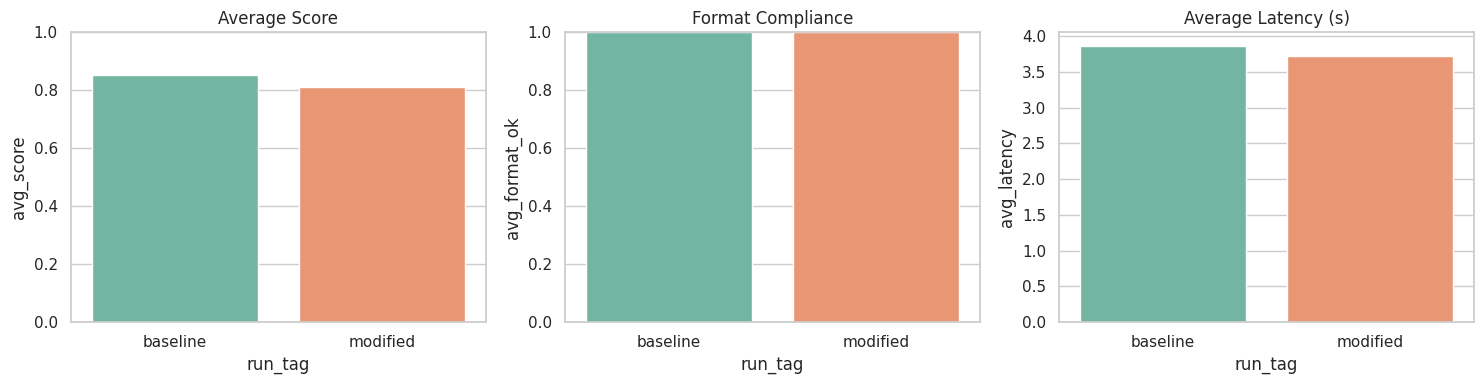

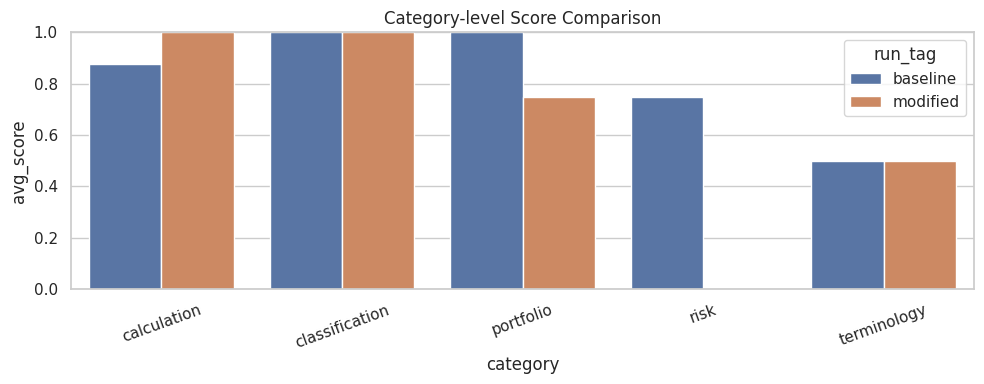

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(data=summary, x='run_tag', y='avg_score', ax=axes[0], palette='Set2')
axes[0].set_ylim(0, 1)
axes[0].set_title('Average Score')

sns.barplot(data=summary, x='run_tag', y='avg_format_ok', ax=axes[1], palette='Set2')
axes[1].set_ylim(0, 1)
axes[1].set_title('Format Compliance')

sns.barplot(data=summary, x='run_tag', y='avg_latency', ax=axes[2], palette='Set2')
axes[2].set_title('Average Latency (s)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(data=category_summary, x='category', y='avg_score', hue='run_tag')
plt.ylim(0, 1)
plt.title('Category-level Score Comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [ ]:
import os, json
from datetime import datetime

os.makedirs('outputs', exist_ok=True)
ts = datetime.now().strftime('%Y%m%d_%H%M%S')

baseline_df.to_csv(f'outputs/baseline_{ts}.csv', index=False)
modified_df.to_csv(f'outputs/modified_{ts}.csv', index=False)
all_df.to_csv(f'outputs/all_{ts}.csv', index=False)
summary.to_csv(f'outputs/summary_{ts}.csv', index=False)
category_summary.to_csv(f'outputs/category_summary_{ts}.csv', index=False)

with open(f'outputs/meta_{ts}.json', 'w', encoding='utf-8') as f:
    json.dump({
        'provider': 'volcengine',
        'base_url': VOLC_BASE_URL,
        'model': ENDPOINT_ID,
        'n_trials': N_TRIALS,
        'baseline_mode': BASELINE_MODE,
        'modified_mode': MODIFIED_MODE,
        'baseline_prompt': BASELINE_PROMPT,
        'modified_prompt': MODIFIED_PROMPT
    }, f, ensure_ascii=False, indent=2)

print('Saved in ./outputs')

Saved in ./outputs
